# Percolation in 2D
Elke Pahl, September 2022, University of Auckland
***

## Square Lattice


Let's look at how real-space renormalization works for site percolation on a square lattice of length $L$; where the occupation probability of a site is given by $p$. We initialize an ($L\times L$) lattice (realized by a numpy array called ```Lattice```), so that sites are occupied with the probability $p$. A value of 1 and 0 is assigned to occupied and unoccupied sites, respectively. We will investigate different coarse graining procedures with different real-space transformation functions of the occupation probability $R_b(p)$. See lecture slides p.55ff for more information.

1. The implementation below realizes the ***majority rule***, which works only for odd scaling factors $b$. The function realizing this renormalizaton is called ```LatticeRen(L,b,lattice)```. Use of ```b = 3``` is recommended, in order to keep the number of lattice points managable. We start with a large lattice, eg. $L = b^7$. We then divide the whole lattice into ($b\times b$) blocks of sites and substitute every block by only one site. The site is occupied when the majority of sites of the ($b\times b$) blocks were occupied, otherwise it is not occupied.

*  Try to approximately locate the non-trivial fix point by doing several renormalization steps (variable ```Nren```, start with ```Nren=4```) varying the occupation probability $p$. 

* Derive the real-space transformation function of the occupation probability $R_b(p)$ for the majority-rule case (see slide 61 for the triangular (honeycomb) lattice).
 
* The second code cell allows you to plot $R_b(p)$ and locate the fixpoints exactly. 


2. Implement the ***top-bottom spanning-cluster rule*** (for $b=2$ only). The new site that substitutes the (2$\times$ 2) block is occupied when a cluster exists that connects the top with the bottom (all blocks with 4 and 3 occupied sites and 2 of the blocks with 2 occupied sites). Locate the corresponding non-trivial fix point and compare with the theoretical value derived from $R_b(p)$. 

3. Calculate the critical exponent $\nu$, that describes the power law behaviour of the correlation length $\xi$ close to the critical occupation probability $p_c$: $\xi(p) \propto |p - p_c|^{-\nu}$ for both cases, the majority and top-bottom spanning-cluster rule and compare with the correct values. For 2D lattices $\nu = 4/3$ and for 2D square lattices $p_c \approx 0.5927$.


4. For your assignment, you are asked to look at the ***spanning cluster rule*** (that takes into account clusters that span from top to bottom **and** left to right.) 

* Derive $R_b(p)$ as a 4th degree polynomial in $p$ and find the three fixed points of this transformation. What are the correlation lengths corresponding to the fixed points? 
* Implement this rule. Find an approximation of the non-trivial fixed point using your program. 
* Describe the associated renormalization group transformation flow in $p$-space.
* Compute the critical exponent $\nu$. 
* Explain why the real-space transformation procedure does not yield the correct value of $\nu$ and $p_c$.


original length of square lattice 128
128
64
32
16
Execution time: 0.030325167001137743 seconds


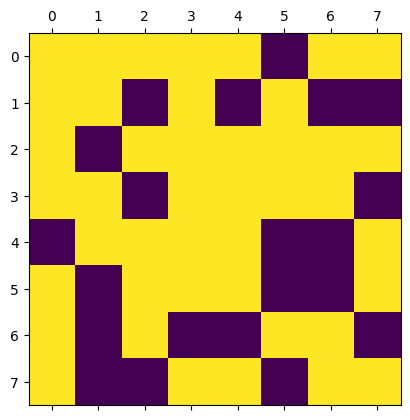

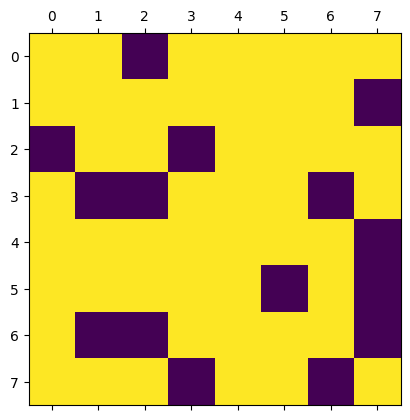

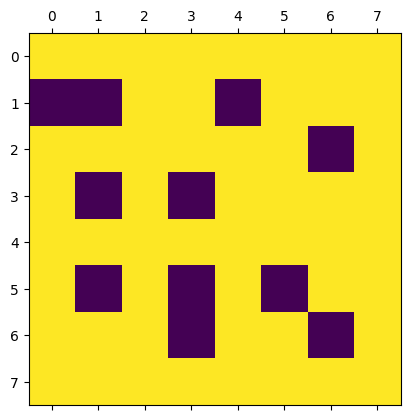

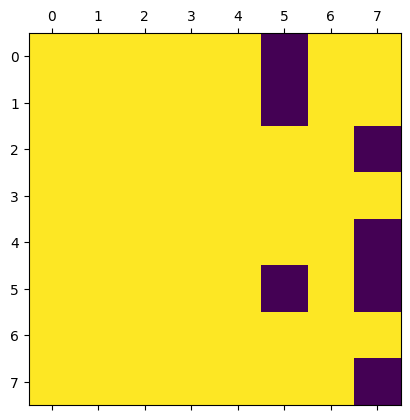

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random as ran

from numba import jit # just-in-time compiler
import timeit

start = timeit.default_timer()

#turn inline plotting on in the Jupyter notebook
%matplotlib inline  

iSeed = None#'iSeed'
ran.seed(iSeed)

# ------------------------ INPUT -------------------------------------------

b       = 2            # scaling factor, should be odd number for majority rule, set to 2 for top-bottom spanning-cluster rule
NLength = b**7         # Lattice size (NLength x NLength)
prob    = 0.7          # occupation probability
Nren    = 4            # number of renormalization steps

print("original length of square lattice", NLength)

# ---------------- function for renormalization, using majority rule --------
#NOTE: b should be odd number
@jit(nopython=True) #compile to machine code 
def LatticeRenMaj(L, b, lattice):
    Lnew = int(L/b)
    newlattice = np.empty((Lnew, Lnew))
    maj = int(b*b/2) + 1
    for j in range(Lnew):
        for i in range(Lnew):
            #majority rule
            sum = 0.
            for k in range(b):
                for l in range(b):
                    sum += lattice[b*i+k,b*j+l] 
            
            occ = int(sum/maj)
            newlattice[i,j] = occ
    return newlattice, Lnew

# ---------------- function for renormalization, using top-down spanning rule --------
#renormalization, spanning cluster, top-bottom (do it for b=2 only)
#@jit(nopython=True) #compile to machine code 
def LatticeRenSpanTopDown(L,b,lattice):
    Lnew = int(L/b)  
    newlattice = np.empty((Lnew, Lnew))
    maj = int(b*b/2) + 1
    for j in range(Lnew):
        for i in range(Lnew):
            #majority rule
            sum = 0.
            for k in range(b):
                for l in range(b):
                    sum += lattice[b*i+k,b*j+l] 
            if sum == 2: 
                sum = sum + lattice[b*i,b*j]*lattice[b*i,b*j+1] + lattice[b*i,b*j]*lattice[b*i+1,b*j] 
            occ = int(sum/maj)
            newlattice[i,j] = occ  



    return newlattice, Lnew 



# -------- Initialization of lattice ----------------

Lattice = np.empty((NLength, NLength))  

for j in range(NLength):
    for i in range(NLength):
        occ = 1
        r = ran.random() 
        if (r > prob): 
            occ = 0  
        Lattice[i][j] = occ
 

#upper left window of lattice that is shown (size of lattice in last renormalization step)
Lwindow = int(NLength/b**Nren) 

#-------- renormalization loop ----------------

for i in range(Nren):
    print(NLength)
    plt.matshow(Lattice[0:Lwindow,0:Lwindow],vmin=0, vmax=1)
    Latticenew, Lnew = LatticeRenSpanTopDown(NLength,b,Lattice) 
    Lattice = Latticenew
    NLength = Lnew
    
stop = timeit.default_timer()
print('Execution time:', stop-start, 'seconds')
    

Let's plot the renormalizartion group transformation $R_b(p)$ to check the fix point.

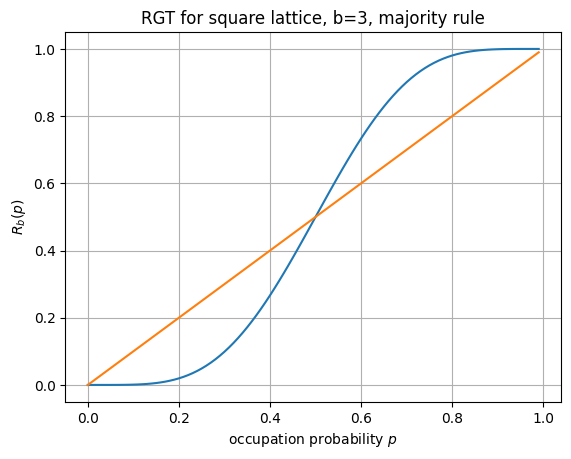

In [11]:
# ----- R_b(p) - renormalization group transformation ----
import math

#R_b(p) for the majority rule, b=3
def rgt_maj(p):
    sum = 0 
    for i in range(5):
        sum += p**(9-i)*(1-p)**i*math.factorial(9)/math.factorial(i)/math.factorial(9-i)
    return sum


#plot
pvals = np.arange(0,1,0.01)
plt.plot(pvals,rgt_maj(pvals))
plt.plot(pvals,pvals)
plt.title("RGT for square lattice, b=3, majority rule")
plt.xlabel("occupation probability $p$")
plt.ylabel("$R_b(p)$")
plt.grid(True)
